Create a map of a phenomenon from raster data and classify with zonal statistics

compare average_precip_km2 with mean_rainfall, what do you observe?
Which country has had the highest variability in rainfall in that month?
submit code and figures, as usual as Jupyter notebook and the maps you have visualized (as png).



In [ ]:
import geopandas as gpd

europe = gpd.read_file('europe_lowres.shp')

europe.head(5)

In [2]:
import rasterio

dataset = rasterio.open('gpcc_precip_2018_11.tif')

print(dataset.profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.9921875, 'width': 1440, 'height': 720, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.25, 0.0, -180.0,
       0.0, -0.25, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


In [3]:
print(dataset.crs)
print(europe.crs)

EPSG:4326
epsg:4326


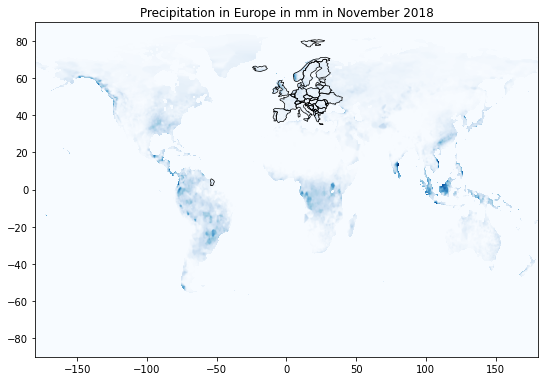

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from rasterio.plot import show

fig, ax = plt.subplots(1, figsize=(9, 7))

show((dataset, 1), cmap='Blues', ax=ax, vmin=0, vmax=800)

europe.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.7)

plt.title("Precipitation in Europe in mm in November 2018")

plt.show()

In [15]:
from rasterstats import zonal_stats

zs = zonal_stats('europe_lowres.shp', 'gpcc_precip_2018_11.tif', stats=['mean','sum','range'], all_touched=True)

print(zs)

[{'mean': 91.65589387464388, 'sum': 160856.09375, 'range': 616.1400241851807}, {'mean': 71.9808385019084, 'sum': 94294.8984375, 'range': 230.8699951171875}, {'mean': 68.82520161290323, 'sum': 96011.15625, 'range': 145.4700050354004}, {'mean': 75.82879356971154, 'sum': 39430.97265625, 'range': 74.13999938964844}, {'mean': 69.48712177579365, 'sum': 87553.7734375, 'range': 226.55000686645508}, {'mean': 64.85654874484182, 'sum': 47150.7109375, 'range': 176.1599998474121}, {'mean': 44.79962671582944, 'sum': 9587.1201171875, 'range': 150.08999633789062}, {'mean': 30.730187136627908, 'sum': 6606.990234375, 'range': 69.26999807357788}, {'mean': 68.46577690972222, 'sum': 6161.919921875, 'range': 84.8800048828125}, {'mean': 73.00171190239044, 'sum': 36646.859375, 'range': 194.9500026702881}, {'mean': 86.53078081354748, 'sum': 15489.009765625, 'range': 80.64999771118164}, {'mean': 71.31284436677632, 'sum': 13549.4404296875, 'range': 83.78000259399414}, {'mean': 61.98021248891844, 'sum': 8739.2099

In [16]:
import pandas as pd

rainstats_df = pd.DataFrame(zs)

rainstats_df.rename(columns={'mean':'mean_rainfall','sum':'sum_rainfall', 'range':'delta_rainfall'}, inplace=True)

europe = pd.concat([europe, rainstats_df], axis=1)

europe.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,mean_rainfall,sum_rainfall,delta_rainfall
23,48958159,Europe,Spain,ESP,1690000.0,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...",53.768276,50703.484375,224.240007
35,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",62.002552,10912.449219,103.060001
9,21529967,Europe,Romania,ROU,441000.0,"POLYGON ((28.23355 45.48828, 28.67978 45.30403...",73.001712,36646.859375,194.950003
11,1944643,Europe,Latvia,LVA,50650.0,"POLYGON ((27.28818 57.47453, 27.77002 57.24426...",71.312844,13549.440430,83.780003
16,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",139.751211,10481.340820,112.160004


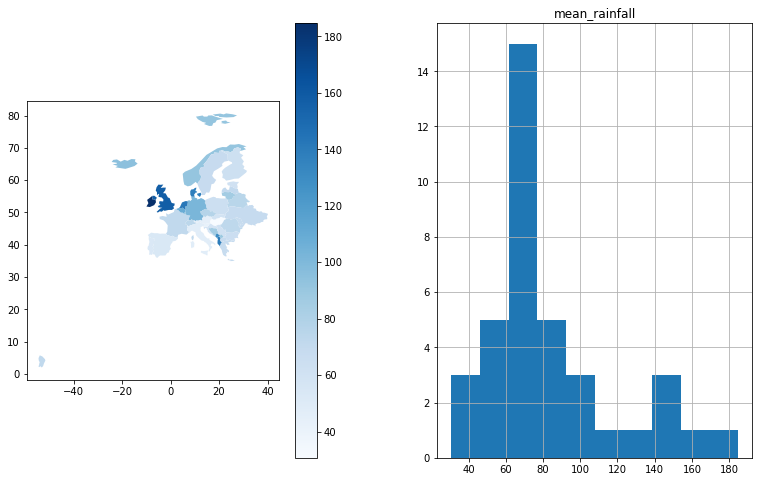

In [17]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe.plot(ax=ax_dat, column="mean_rainfall", cmap="Blues", legend=True)

europe.hist(ax=ax_hist, column="mean_rainfall")

plt.title("mean_rainfall")

plt.show()

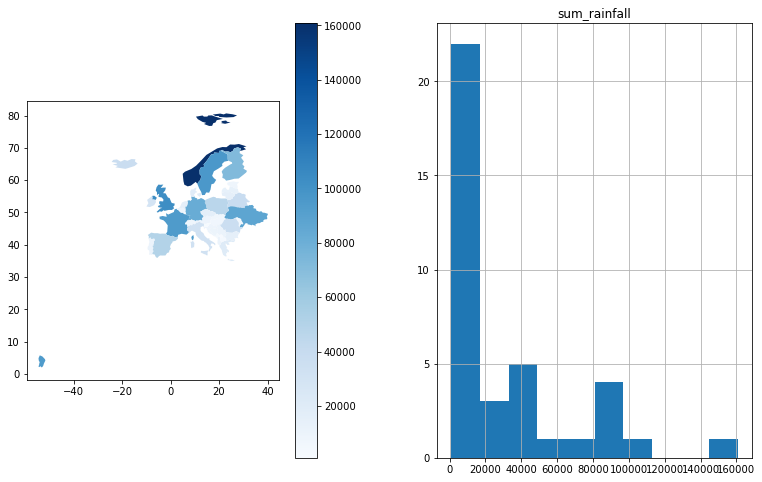

In [18]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe.plot(ax=ax_dat, column="sum_rainfall", cmap="Blues", legend=True)

europe.hist(ax=ax_hist, column="sum_rainfall")

plt.title("sum_rainfall")

plt.show()

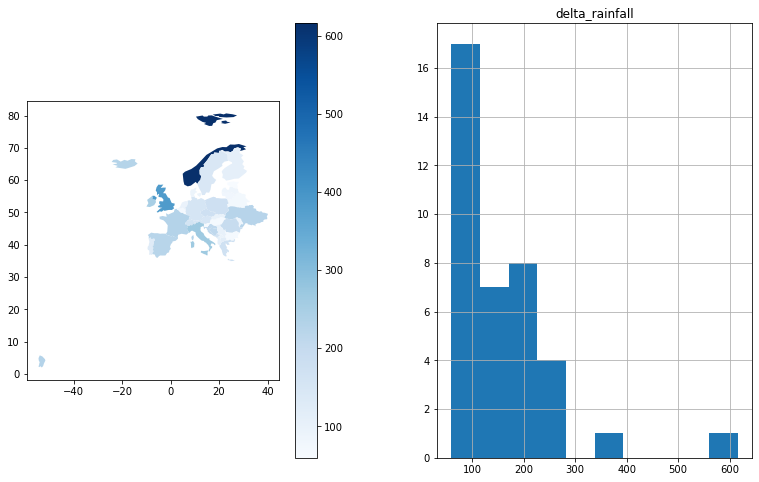

In [19]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe.plot(ax=ax_dat, column="delta_rainfall", cmap="Blues", legend=True)

europe.hist(ax=ax_hist, column="delta_rainfall")

plt.title("delta_rainfall")

plt.show()

In [20]:
europe_3035 = europe.to_crs(epsg=3035)

europe_3035['area_km2'] = europe_3035.area / 1000

europe_3035['average_precip_km2'] = europe_3035.apply(lambda x: x['sum_rainfall'] / x['area_km2'], axis=1)

In [21]:
europe_3035.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,mean_rainfall,sum_rainfall,delta_rainfall,area_km2,average_precip_km2
32,10674723,Europe,Czechia,CZE,350900.0,"POLYGON ((4672059.883 3122661.261, 4707828.459...",77.106856,15961.119141,176.169994,8.120719e+07,0.000197
34,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((5339820.976 2219012.193, 5386224.141...",69.399323,4094.560059,118.450001,2.506166e+07,0.000163
2,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((4380406.056 3973224.784, 4404509.373...",68.825202,96011.156250,145.470005,4.505641e+08,0.000213
21,17084719,Europe,Netherlands,NLD,870800.0,"POLYGON ((4115591.141 3379313.797, 4126465.246...",142.344727,15657.919922,96.770004,4.002133e+07,0.000391
23,48958159,Europe,Spain,ESP,1690000.0,"POLYGON ((2771755.985 1735745.176, 2771915.172...",53.768276,50703.484375,224.240007,5.023083e+08,0.000101


In [22]:
import mapclassify as mc

# Define the number of classes
n_classes = 5

In [23]:
# Create a Natural Breaks classifier
classifier = mc.NaturalBreaks.make(k=n_classes)

In [24]:
# Classify the data
europe_3035['average_precip_km2_classes'] = europe_3035[['average_precip_km2']].apply(classifier)

# Let's see what we have
europe_3035.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,mean_rainfall,sum_rainfall,delta_rainfall,area_km2,average_precip_km2,average_precip_km2_classes
0,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((4426956.698 6268775.764, 44311...",91.655894,160856.093750,616.140024,3.979478e+08,0.000404,3
1,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-2491399.942 667181.378, -2581...",71.980839,94294.898438,230.869995,6.448534e+08,0.000146,1
2,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((4380406.056 3973224.784, 4404509.373...",68.825202,96011.156250,145.470005,4.505641e+08,0.000213,2
3,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((5436932.506 3816251.143, 5507407.920...",75.828794,39430.972656,74.139999,2.089678e+08,0.000189,2
4,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((5788113.051 3443307.264, 5813713.255...",69.487122,87553.773438,226.550007,5.725399e+08,0.000153,1


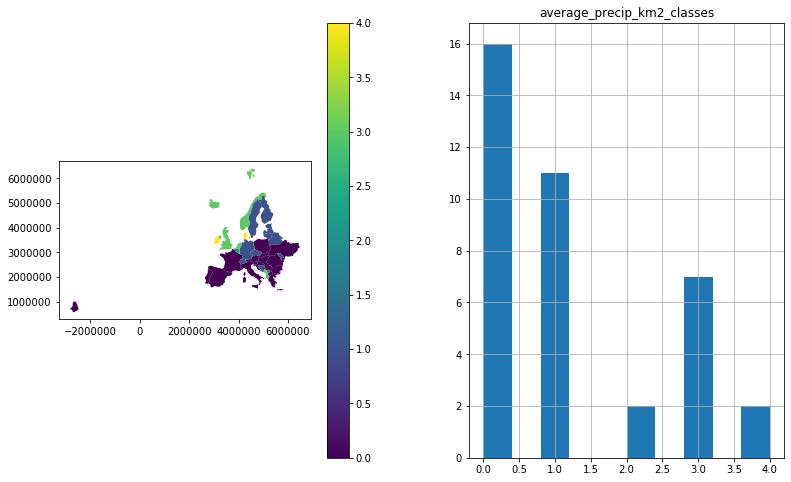

In [18]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe_3035.plot(ax=ax_dat, column="average_precip_km2_classes", cmap="viridis", legend=True)

europe_3035.hist(ax=ax_hist, column="average_precip_km2_classes")

plt.title("average_precip_km2_classes")

plt.show()

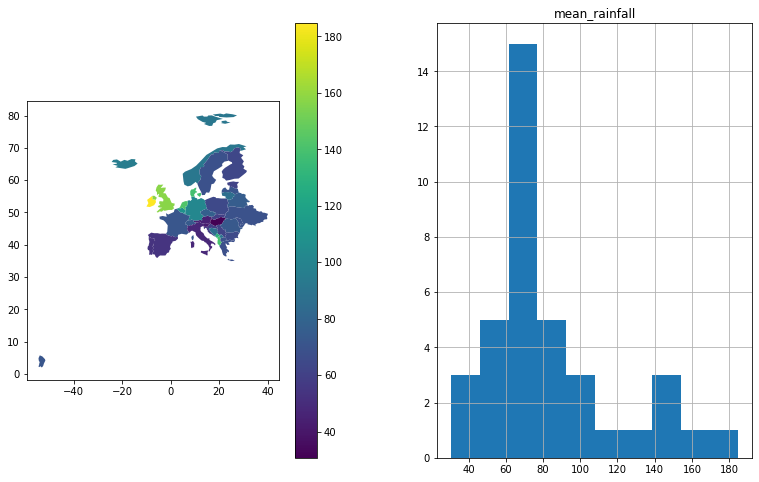

In [25]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe.plot(ax=ax_dat, column="mean_rainfall", cmap="viridis", legend=True)

europe.hist(ax=ax_hist, column="mean_rainfall")

plt.title("mean_rainfall")

plt.show()

In [28]:
# Classify the data
europe_3035['mean_rainfall_classes'] = europe_3035[['mean_rainfall']].apply(classifier)

# Let's see what we have
europe_3035.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,mean_rainfall,sum_rainfall,delta_rainfall,area_km2,average_precip_km2,average_precip_km2_classes,mean_rainfall_classes
0,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((4426956.698 6268775.764, 44311...",91.655894,160856.093750,616.140024,3.979478e+08,0.000404,3,2
1,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-2491399.942 667181.378, -2581...",71.980839,94294.898438,230.869995,6.448534e+08,0.000146,1,1
2,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((4380406.056 3973224.784, 4404509.373...",68.825202,96011.156250,145.470005,4.505641e+08,0.000213,2,1
3,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((5436932.506 3816251.143, 5507407.920...",75.828794,39430.972656,74.139999,2.089678e+08,0.000189,2,1
4,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((5788113.051 3443307.264, 5813713.255...",69.487122,87553.773438,226.550007,5.725399e+08,0.000153,1,1


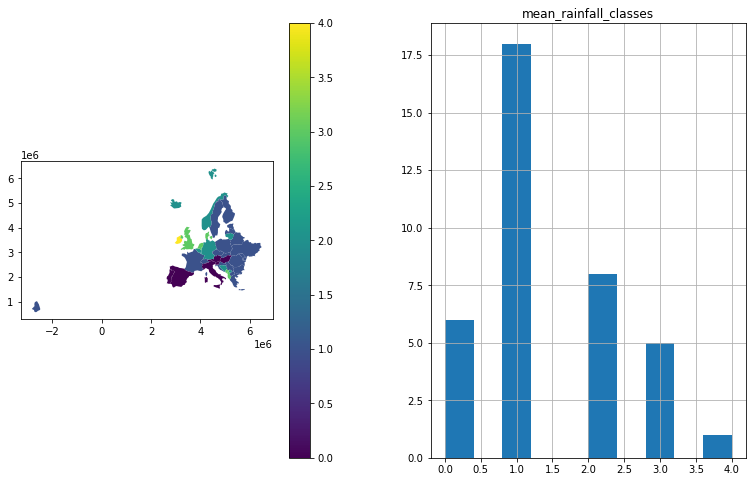

In [27]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe_3035.plot(ax=ax_dat, column="mean_rainfall_classes", cmap="viridis", legend=True)

europe_3035.hist(ax=ax_hist, column="mean_rainfall_classes")

plt.title("mean_rainfall_classes")

plt.show()

5.  Answer questions and submit all results

-   compare `average_precip_km2` with `mean_rainfall`, what do you
    observe?
-   Which country has had the highest variability in rainfall in that
    month?
-   submit code and figures, as usual as Jupyter notebook and the maps
    you have visualized (as png).

### Optional task for advanced students (additional max 3 points)

Clip the precipitation raster file (while still in EPSG:4326) for
European countries and then reproject (into EPSG:3035) and plot it with
the Europe countries shapefile (in EPSG:3035). Make it look good.